In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.table import Table

import omnitool
from omnitool.literature_values import *

import sys

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def normal(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2/(2*sigma**2))

In [8]:
'''<Just testing some transformations>'''
x = np.linspace(-10, 10,1000)
n0 = normal(x, 0., 1.)
n1 = normal(x, 5., 2.)

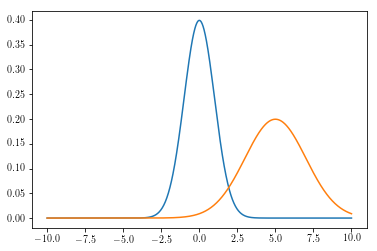

In [9]:
plt.plot(x,n0)
plt.plot(x,n1)
plt.show()

In [5]:
data = Table.read('../data/KepxDR2/kepler_dr2_1arcsec.fits', format='fits')
df = data.to_pandas()
df.rename(columns={'kepid':'KICID'},inplace=True)
df.head(2)
print(len(df))

195830


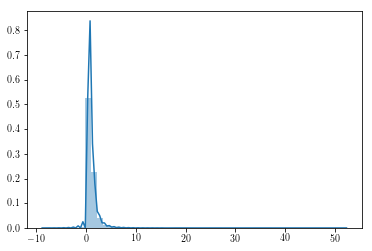

Populating the interactive namespace from numpy and matplotlib


In [8]:
sns.distplot(df.parallax.values[np.isfinite(df.parallax)])
plt.show()
%pylab qt

In [8]:
'''<<<ASTROMETRIC>>>'''
df['r_err'] = np.sqrt((df.r_hi-df.r_est)**2 + (df.r_est - df.r_lo)**2)

sg = omnitool.spyglass()
sg.pass_position(df.ra, df.dec, frame='icrs')
sg.pass_distance(df.r_est, df.r_err)

sg.pass_magnitude(df.kmag, band='Ks')
df['MKs'], df['MKs_err'] = sg.get_M()

Before : 195830


AttributeError: 'DataFrame' object has no attribute 'phot_MKs'

In [21]:
#Now we need to check content for Nans
print('Before : '+str(len(df)))
df = df[np.isfinite(df.MKs)]
print('After : '+str(len(df)))
list(df)

Before : 195585
After : 195585


['designation',
 'source_id',
 'gaia_ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'duplicated_source',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_mean_flux_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'bp_g',
 'g_rp',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag',
 'l',
 'b',
 'ecl_lon',
 'ecl_lat',
 'teff_val',
 'teff_percentile_lower',
 'teff_percentile_upper',
 'a_g_val',
 'a_g_percentile_lower',
 'a_g_percentile_upper'

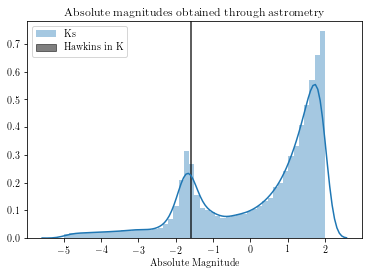

In [15]:
#Now lets study the distributions
sel = (df.MKs > -5.) & (df.MKs < 2.)
sns.distplot(df.MKs[sel], label='Ks')
plt.axvspan(hawkvals['Ks']-hawkerr,hawkvals['Ks']+hawkerr,alpha=.5,color='k',label='Hawkins in K')
plt.title('Absolute magnitudes obtained through astrometry')
plt.xlabel('Absolute Magnitude')
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


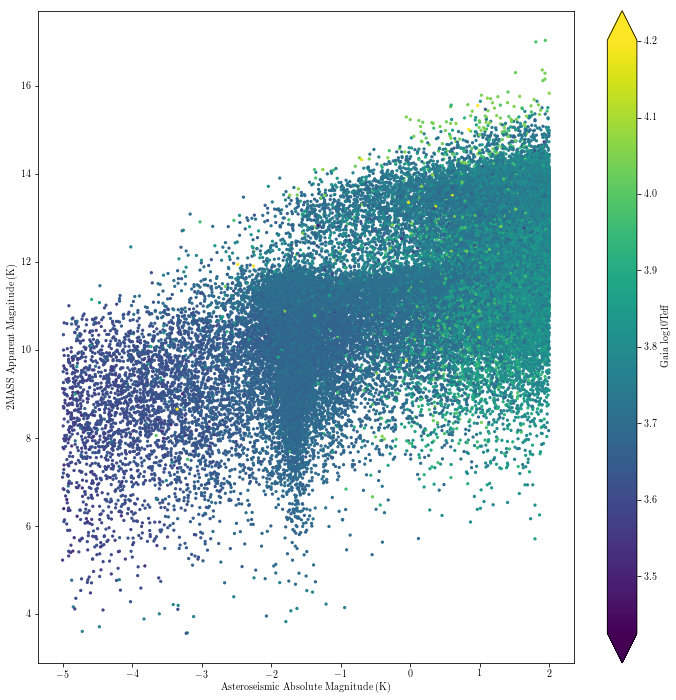

In [34]:
%pylab inline
fig, ax = plt.subplots(figsize=(12,12))
c = ax.scatter(df.MKs[sel],df.kmag[sel],c=np.log10(df.teff[sel]),s=5,zorder=1000)
# ax.errorbar(df.MKs[sel],df.kmag[sel],xerr=df.MKs_err[sel],alpha=.5,fmt='none',c='grey',zorder=999)
ax.set_xlabel('Asteroseismic Absolute Magnitude (K)')
ax.set_ylabel('2MASS Apparent Magnitude (K)')
fig.colorbar(c,extend='both',label='Gaia log10Teff')
# ax.set_ylim(3., 12.)
plt.show()